<a href="https://colab.research.google.com/github/rvoljanin/neuraluniversity/blob/master/notebooks/ai/exercise2/exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Добавляем библиотеки



In [2]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization # Основные слои
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
import pandas as pd # Библиотека pandas
from sklearn.preprocessing import LabelEncoder, StandardScaler # Функции для нормализации данных
from sklearn import preprocessing # Пакет предварительной обработки данных
from sklearn.model_selection import train_test_split

#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

Описываем модель

In [2]:
# Функция пересоздаёт пустую сеть
def createModel(dl=0,bnl=0):
    model = Sequential() # Создаём сеть прямого распространения
    model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
    if dl:
        model.add(Dropout(0.4))
    if bnl:
        model.add(BatchNormalization())
    model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
    if dl:
        model.add(Dropout(0.4))
    if bnl:
        model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
    print(model.summary()) #Вывод структуры модели

    return model # Возвращаем созданную сеть

Визуализируем результаты обучения

In [3]:
def printHistory(hist):
    plt.figure(figsize=(10,10))
    # Выводим график точности на обучающей выборке
    # label - имя графика в легенде
    plt.plot(hist.history['accuracy'], label='Доля верных ответов на обучающем наборе')

    # Выводим график точности на проверочной выборке
    plt.plot(hist.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')

    # Выводим подписи осей
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Доля верных ответов')

    # Выводим легенду
    plt.legend()
    plt.show()

    # Выводим графики ошибки
    plt.figure(figsize=(10,10))
    plt.plot(hist.history['loss'], label='Ошибка на обучающем наборе')
    plt.plot(hist.history['val_loss'], label='Ошибка на проверочном наборе')
    plt.xlabel('Эпоха обучения')
    plt.ylabel('Ошибка')
    plt.legend()
    plt.show()

    return round(float(str(history.history['val_accuracy'][-1])),4)

Проверяем модель на тестовых данных

In [4]:
def modelTest(model,x_test,y_test):
    # Вычисляем результаты сети на тестовом наборе
    scores = model.evaluate(x_test, y_test, verbose=True)

    print(scores[1])
    print("Доля верных ответов на тестовых данных, в процентах: ", round(scores[1] * 100, 4), "%", sep="")

    return round(scores[1],4)

Формируем наборы данных

In [5]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() #Загрузка данных Mnist

#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

#Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

# Таблица результатов
results = {'model1': [], 'model1d': [], 'model1bn': [], 'model3': []}

Тренируем три модели с тестовыми базами в 50000, 10000 и 500 изображений

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.2264 - accuracy: 0.9331 - val_loss: 0.1264 - val_accuracy: 0.9623
Epoch 2/50
391/391 [==============================] - 1s 4ms/step - loss: 0.0821 - accuracy: 0.9743 - val_loss: 0.0923 - val_accuracy: 0.9722
Epoch 3/50
391/391 [==============================] - 1s 4ms/step - loss: 0.0526 - accuracy

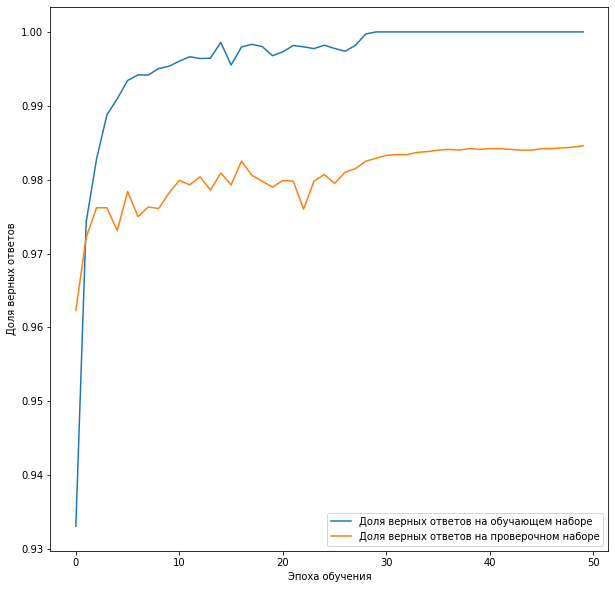

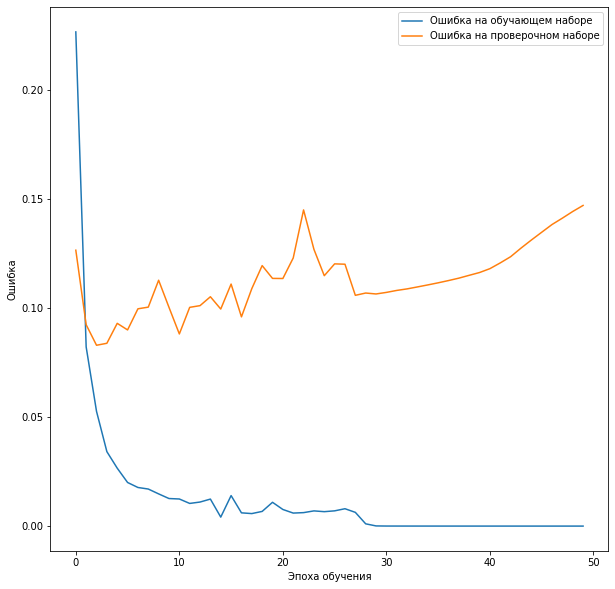

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
79/79 [==============================] - 1s 16ms/step - loss: 0.4684 - accuracy: 0.8665 - val_loss: 0.2633 - val_accuracy: 0.9212
Epoch 2/50
79/79 [==============================] - 1s 17ms/step - loss: 0.1671 - accuracy: 0.9504 - val_loss: 0.2155 - val_accuracy: 0.9348
Epoch 3/50
79/79 [==============================] - 1s 16ms/step - loss: 0.1046 - accuracy:

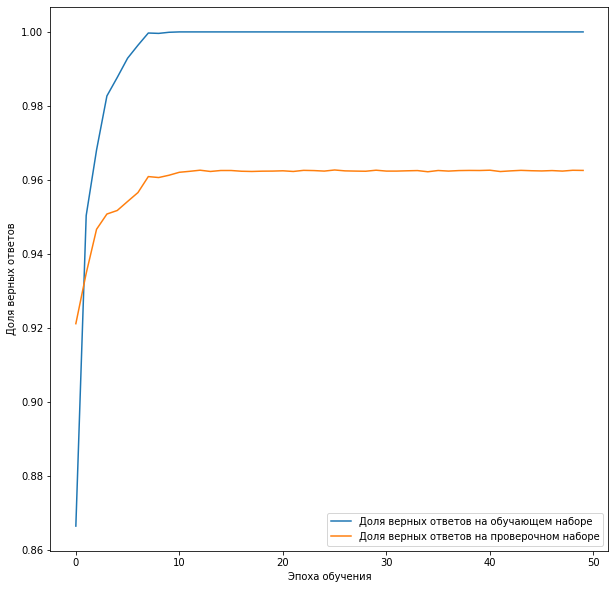

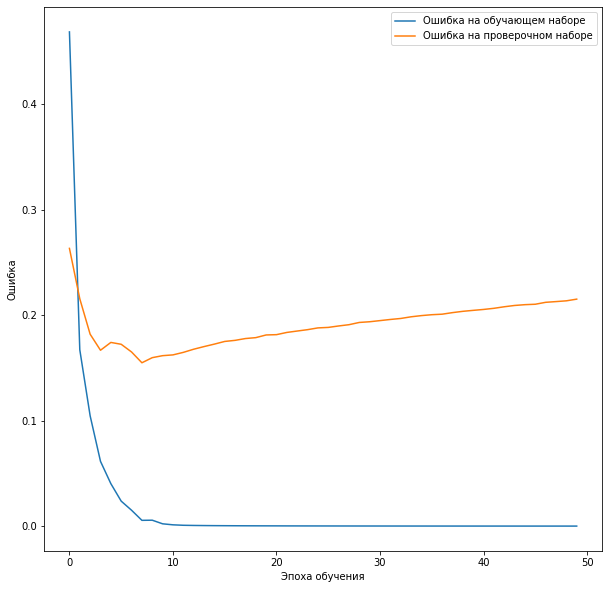

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
4/4 [==============================] - 1s 319ms/step - loss: 1.8130 - accuracy: 0.5080 - val_loss: 1.2618 - val_accuracy: 0.7085
Epoch 2/50
4/4 [==============================] - 1s 294ms/step - loss: 0.7713 - accuracy: 0.8520 - val_loss: 0.7397 - val_accuracy: 0.7793
Epoch 3/50
4/4 [==============================] - 1s 309ms/step - loss: 0.3776 - accuracy: 0.

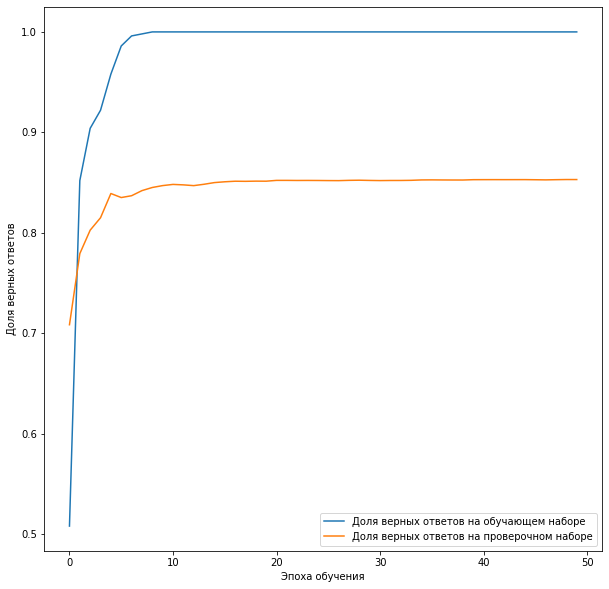

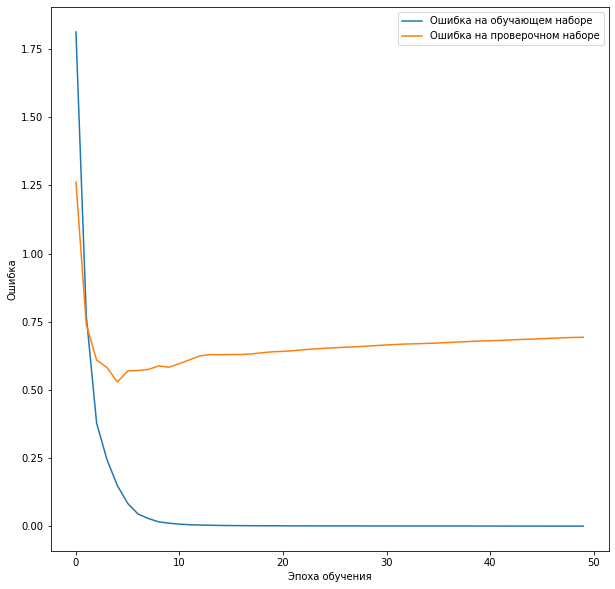

In [6]:
for test_sample_size in (50000,10000,500): # три модели с разным размером тестовой и валидационной базы
    model = createModel() # создаём пустую модель
    history = model.fit(x_train[:test_sample_size], y_train[:test_sample_size], batch_size=128, epochs=50, verbose=1, validation_data=(x_train[test_sample_size:],y_train[test_sample_size:])) # тренируем модель на тестовой выборке
    test_accuracy = modelTest(model,x_test,y_test)
    val_accuracy = printHistory(history) # визуализируем результаты обучения
    results['model1'].append(val_accuracy)
    results['model1'].append(test_accuracy)

Выводы
- на максимальном размере базы как и на более мелких происходит переобучение модели. Однако на базе максимального размера график ошибки на обучающем наборе не уходит в ноль даже на 50 эпохе. Из этого можно сделать вывод что модель всё ещё не заучила базу.
- на базах в 10000 и 500 изображений модели демонстрируют схожее поведение, переобучение начинается в первые 5 эпох, при этом ошибка на тестовых данных уходит в ноль в те же 5 эпох и больше не менятся
- на графиках отражающих количество верных ответов на валидационных данных прослеживается чёткая зависимость между качество распознавания и размером тестовой выборки.
- на графике количества верных ответов модели с максимальной тестовой базой наблюдаются постоянные колебания от эпохи к эпохе, которые оставляю надежду улучшить этот показатель, на графиках других моделей наблюдается достижение максимального значения "потолка"

- судя по результатам размер базы для обучения напрямую влияет на результирующую точность модели.
- переобучение модели начинается практически в одно и то же время(эпоху) независимо от размера базы.

Две модели, одна с двумя дополнительными Dropout слоями, другая с двумя BatchNormalization слоями

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout (Dropout)            (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
391/391 [==============================] - 2s 4ms/step - loss: 0.3151 - accuracy: 0.9044 - val_los

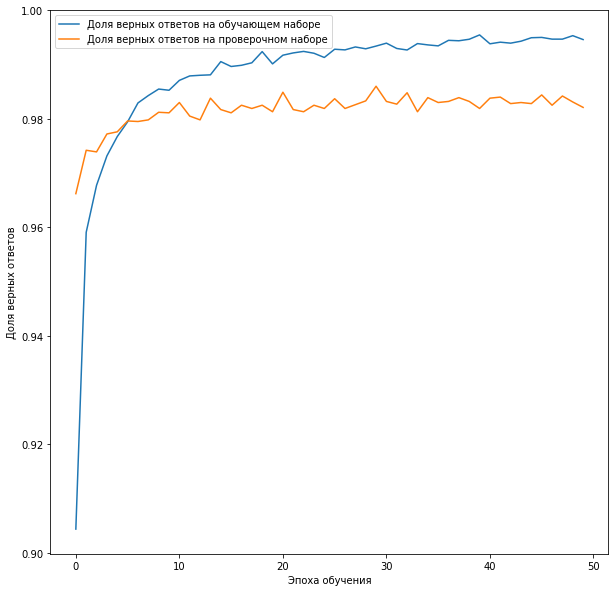

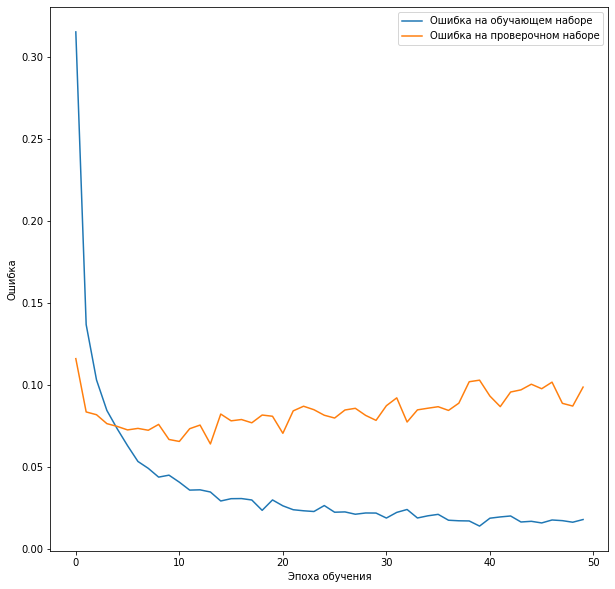

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
79/79 [==============================] - 1s 16ms/step - loss: 0.6338 - accuracy: 0.8020 - val_loss

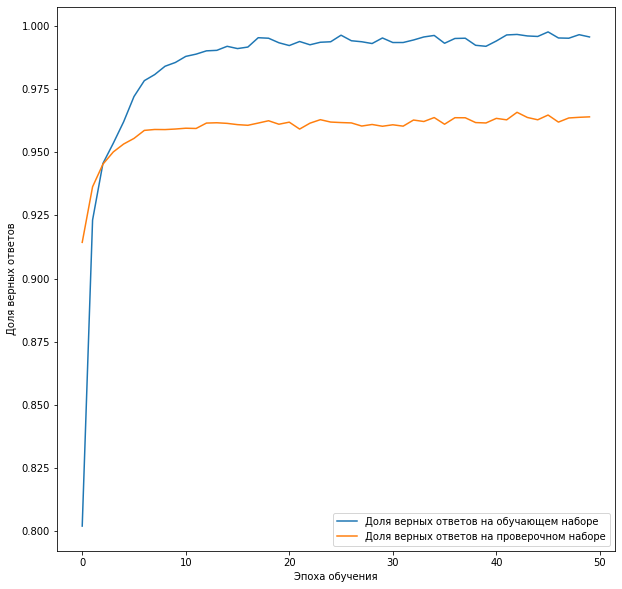

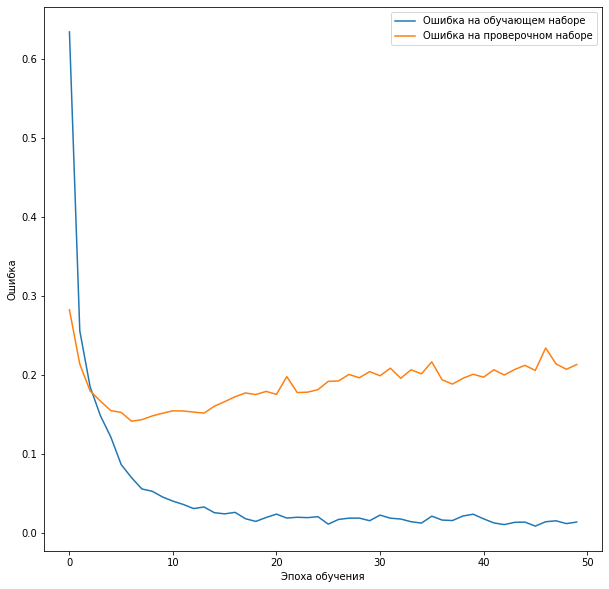

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                4010      
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
4/4 [==============================] - 1s 320ms/step - loss: 2.0353 - accuracy: 0.3520 - val_loss:

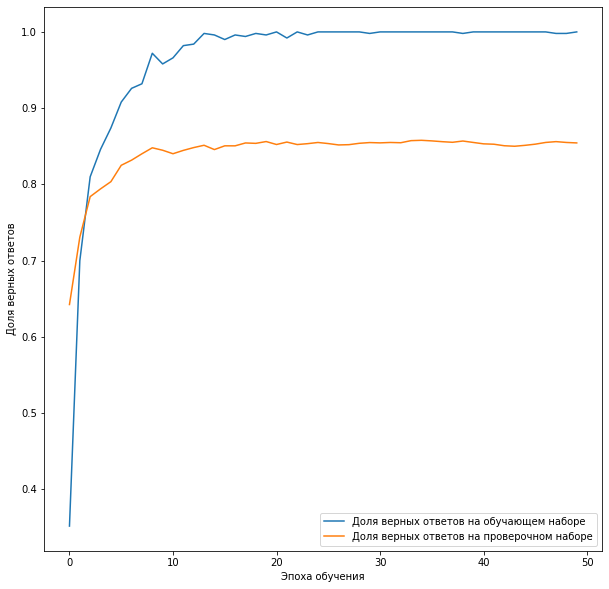

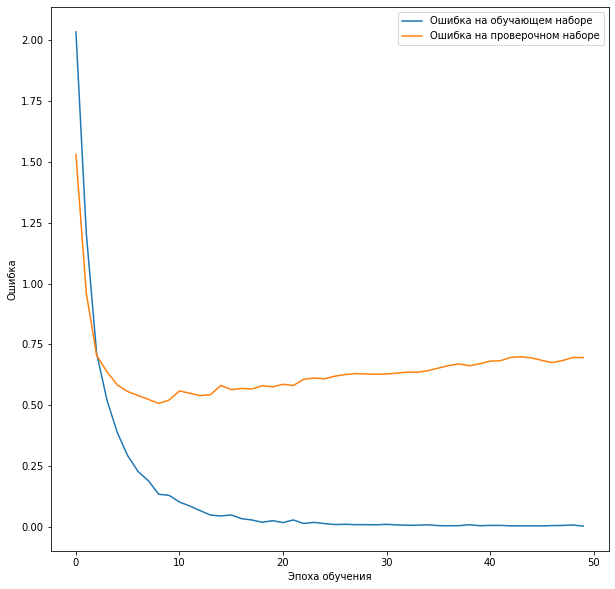

In [7]:
for test_sample_size in (50000,10000,500): # три модели с разным размером тестовой и валидационной базы
    model = createModel(dl=1) # создаём пустую модель
    history = model.fit(x_train[:test_sample_size], y_train[:test_sample_size], batch_size=128, epochs=50, verbose=1, validation_data=(x_train[test_sample_size:],y_train[test_sample_size:])) # тренируем модель на тестовой выборке
    test_accuracy = modelTest(model,x_test,y_test)
    val_accuracy = printHistory(history) # визуализируем результаты обучения
    results['model1d'].append(val_accuracy)
    results['model1d'].append(test_accuracy)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 800)               628000    
_________________________________________________________________
batch_normalization (BatchNo (None, 800)               3200      
_________________________________________________________________
dense_19 (Dense)             (None, 400)               320400    
_________________________________________________________________
batch_normalization_1 (Batch (None, 400)               1600      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                4010      
Total params: 957,210
Trainable params: 954,810
Non-trainable params: 2,400
_________________________________________________________________
None
Epoch 1/50
391/391 [==============================] - 2s 6ms/step - loss: 0.1776 - accuracy: 0.9459 - val

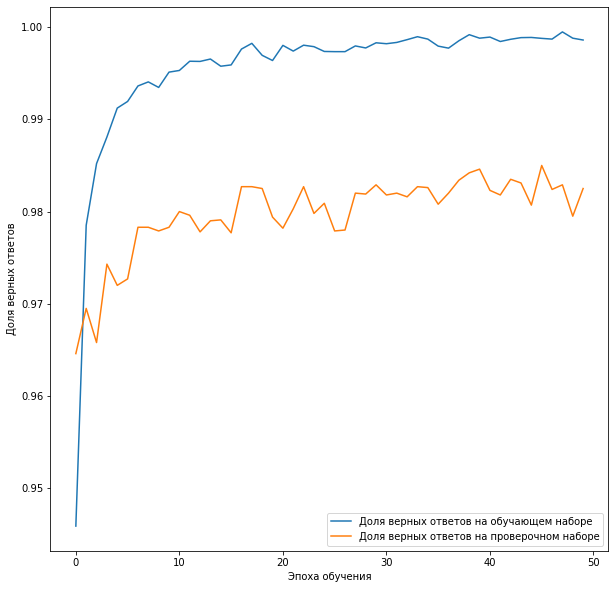

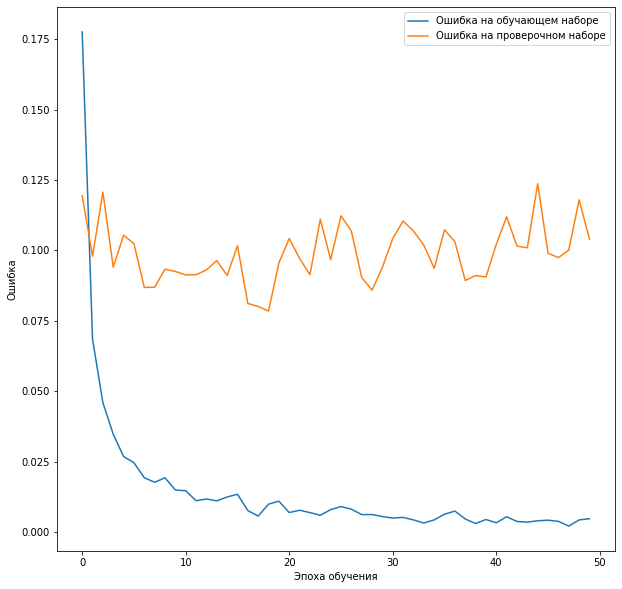

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 800)               628000    
_________________________________________________________________
batch_normalization_2 (Batch (None, 800)               3200      
_________________________________________________________________
dense_22 (Dense)             (None, 400)               320400    
_________________________________________________________________
batch_normalization_3 (Batch (None, 400)               1600      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                4010      
Total params: 957,210
Trainable params: 954,810
Non-trainable params: 2,400
_________________________________________________________________
None
Epoch 1/50
79/79 [==============================] - 2s 19ms/step - loss: 0.3209 - accuracy: 0.9055 - val_

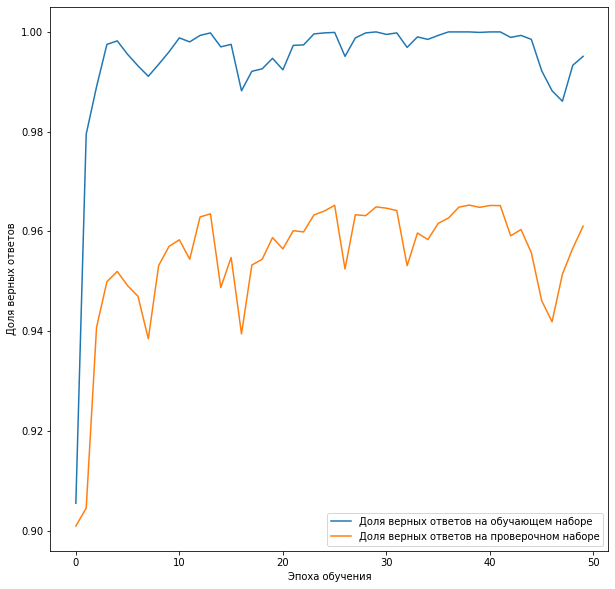

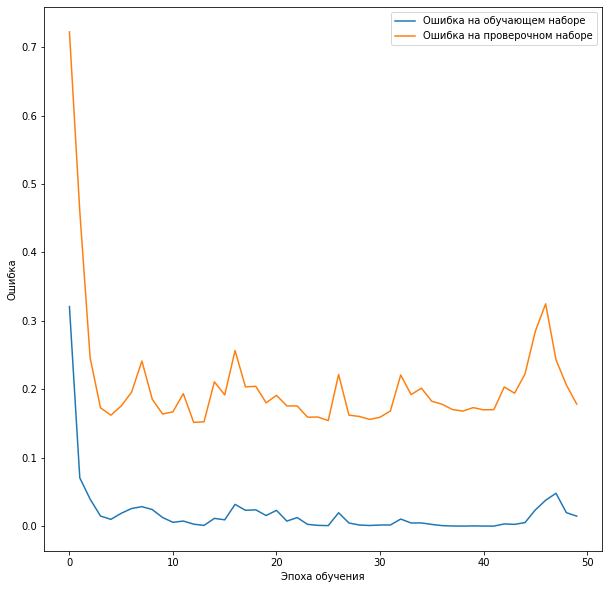

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 800)               628000    
_________________________________________________________________
batch_normalization_4 (Batch (None, 800)               3200      
_________________________________________________________________
dense_25 (Dense)             (None, 400)               320400    
_________________________________________________________________
batch_normalization_5 (Batch (None, 400)               1600      
_________________________________________________________________
dense_26 (Dense)             (None, 10)                4010      
Total params: 957,210
Trainable params: 954,810
Non-trainable params: 2,400
_________________________________________________________________
None
Epoch 1/50
4/4 [==============================] - 1s 319ms/step - loss: 1.5600 - accuracy: 0.5560 - val_l

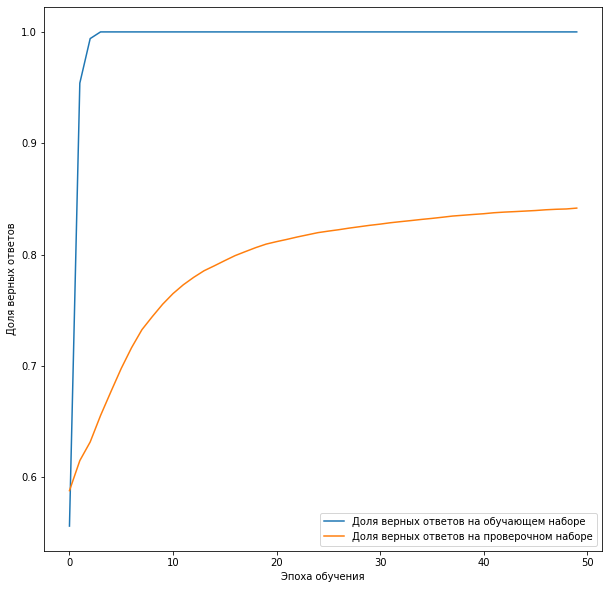

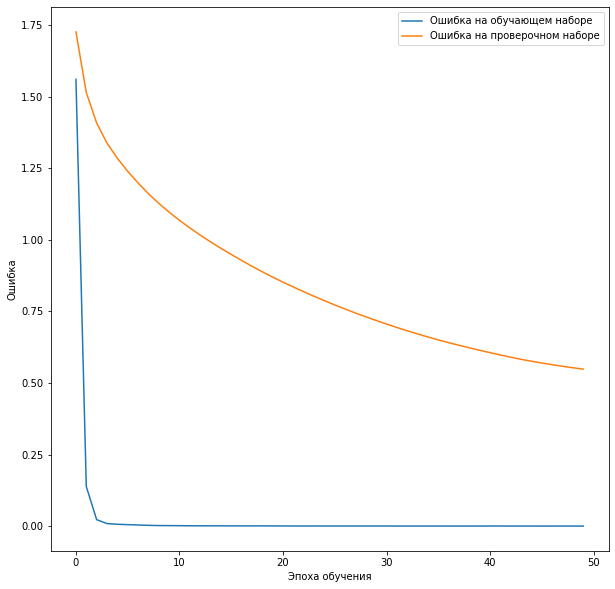

In [8]:
for test_sample_size in (50000,10000,500): # три модели с разным размером тестовой и валидационной базы
    model = createModel(bnl=1) # создаём пустую модель
    history = model.fit(x_train[:test_sample_size], y_train[:test_sample_size], batch_size=128, epochs=50, verbose=1, validation_data=(x_train[test_sample_size:],y_train[test_sample_size:])) # тренируем модель на тестовой выборке
    test_accuracy = modelTest(model,x_test,y_test)
    val_accuracy = printHistory(history) # визуализируем результаты обучения
    results['model1bn'].append(val_accuracy)
    results['model1bn'].append(test_accuracy)

Выводы
- Ипользование только Dropout или только BatchNormalisation слоёв частично подавляет переобучение но не позволяет полность избавиться от него
- Ни один из слоёв существенно не отразился на точности модели
- Очевидно что применяться эти методы должны совместно

Функция создающая модель 4 Dense, 3 Dropout и 3 BatchNormalization слоя

In [9]:
# Функция пересоздаёт пустую сеть
def createModel3():
    model = Sequential() # Создаём сеть прямого распространения
    model.add(Dense(800, input_dim=784, activation="relu")) # Добавляем полносвязный слой на 800 нейронов с relu-активацией
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(400, activation="relu")) # Добавляем полносвязный слой на 400 нейронов с relu-активацией
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(400, activation="relu"))
    model.add(Dropout(0.4))
    model.add(BatchNormalization())
    model.add(Dense(10, activation="softmax")) # Добавляем полносвязный слой на 10 нейронов с softmax-активацией

    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]) # Компилируем модель
    print(model.summary()) #Вывод структуры модели

    return model # Возвращаем созданную сеть

Тренируем эту модель на базах разных размеров

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 800)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 800)               3200      
_________________________________________________________________
dense_28 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 400)               1600      
_________________________________________________________________
dense_29 (Dense)             (None, 400)              

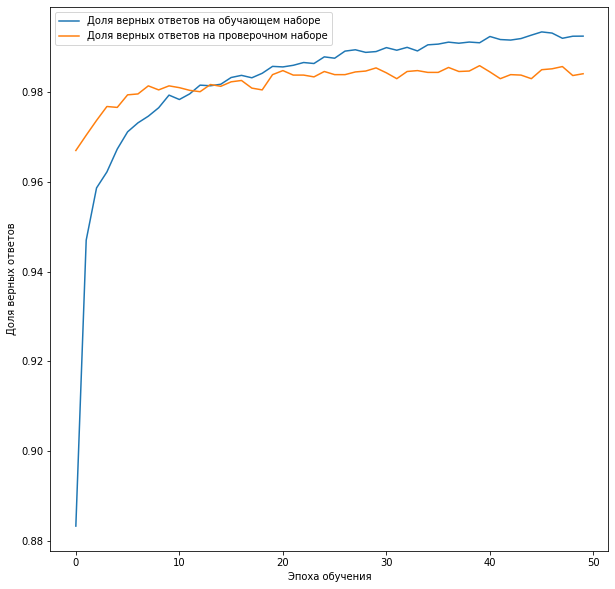

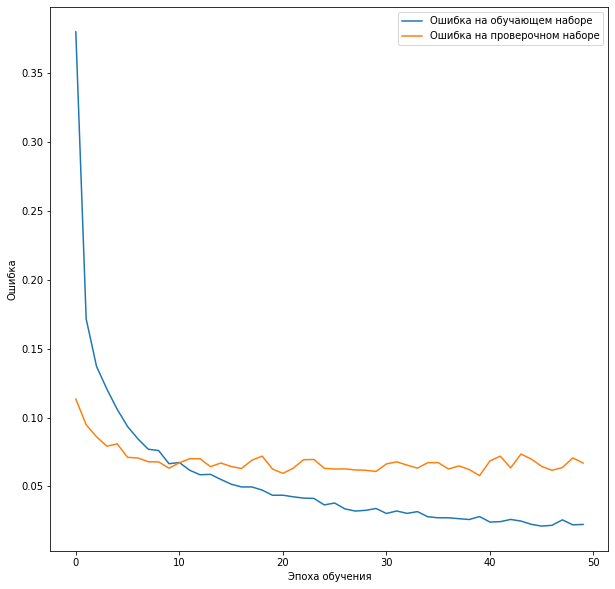

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 800)               0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 800)               3200      
_________________________________________________________________
dense_32 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_10 (Dropout)         (None, 400)               0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 400)               1600      
_________________________________________________________________
dense_33 (Dense)             (None, 400)             

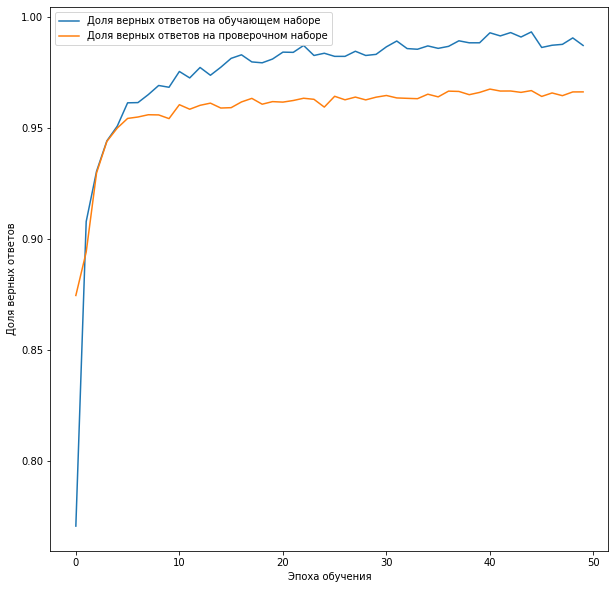

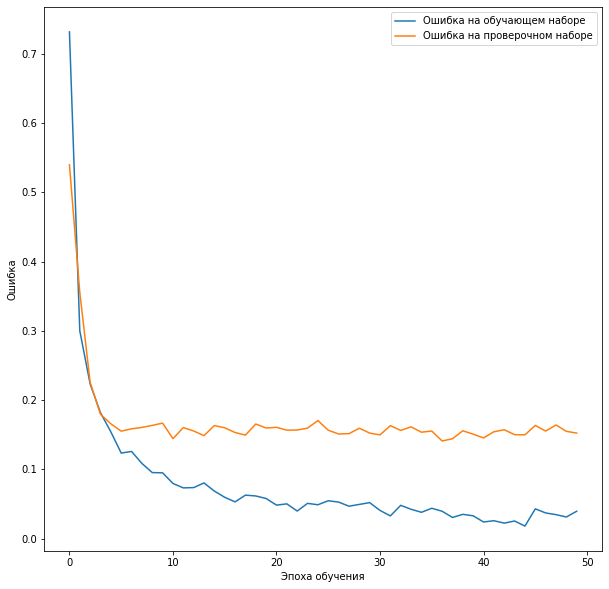

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 800)               0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 800)               3200      
_________________________________________________________________
dense_36 (Dense)             (None, 400)               320400    
_________________________________________________________________
dropout_13 (Dropout)         (None, 400)               0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 400)               1600      
_________________________________________________________________
dense_37 (Dense)             (None, 400)             

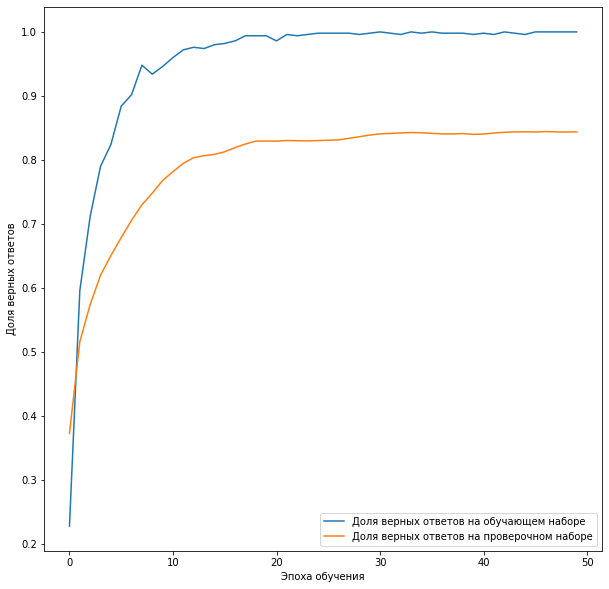

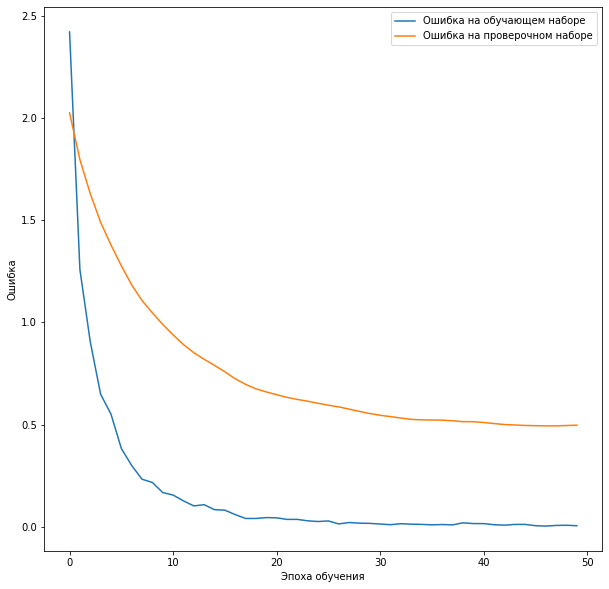

In [10]:
for test_sample_size in (50000,10000,500): # три модели с разным размером тестовой и валидационной базы
    model = createModel3() # создаём пустую модель
    history = model.fit(x_train[:test_sample_size], y_train[:test_sample_size], batch_size=128, epochs=50, verbose=1, validation_data=(x_train[test_sample_size:],y_train[test_sample_size:])) # тренируем модель на тестовой выборке
    test_accuracy = modelTest(model,x_test,y_test)
    val_accuracy = printHistory(history) # визуализируем результаты обучения
    results['model3'].append(val_accuracy)
    results['model3'].append(test_accuracy)

Выводы
- время обучения на максимальном размере базы ощутимо выросло, это свидетельствует об увеличении сложности рассчётов(количества операций)
- на базах в 50000 и 10000 эффект переобучения практически не наблюдается, ошибка на валидационных данных колеблется в узком коридоре
- на маленькой базе в 500 изображений ошибка на валидационных данных продолжает стабильное падение даже на 50 эпохе, демонстрируя при этом значительно снижение по сравнению с первым экспериментом
- при этом на базе в 500 изображений график доли верных ответов хоть и продолжает стабильный рост, на 50 эпохах не отличается от первого эксперимента
- этот же эффект наблюдается и на остальных базах

- похоже что Dropout очень эффективен в подавлении эффекта переобучения, при этом чем меньше база тем эффективнее
- не до конца понятно как связано уменьшение ошибки на валидационных данных и "неизменность" доли верных ответов на тех же данных между экспериментами. Интуитивно снижение ошибки должно было повлеч увеличение доли верных ответов, но этого не происходит
- не заметил эффекта от батч нормализации, похоже что данные MNIST уже и так не плохо нормализованы

In [11]:
print('{0}\t\t|{1}\t|{2}\t|{3}\t|{4}\t|{5}\t|{6}\t|'.format('model','50k val','50k test','10k val','10k test','500 val','500 test'))
for m in results.keys():
    print('{0}  \t|{1}  \t|{2}  \t|{3}  \t|{4}  \t|{5}  \t|{6}  \t|'.format(m,results[m][0],results[m][1],results[m][2],results[m][3],results[m][4],results[m][5]))


model		|50k val	|50k test	|10k val	|10k test	|500 val	|500 test	|
model1  	|0.9846  	|0.9864  	|0.9626  	|0.9636  	|0.853  	|0.8612  	|
model1d  	|0.9821  	|0.9853  	|0.9641  	|0.966  	|0.8544  	|0.8613  	|
model1bn  	|0.9825  	|0.9837  	|0.9611  	|0.9633  	|0.8417  	|0.8489  	|
model3  	|0.9841  	|0.9844  	|0.9662  	|0.967  	|0.8438  	|0.849  	|


Задание PRO 1

Загружаем данные

In [11]:
df = pd.read_csv("sonar.csv", header=None)   # header=None, когда данные не имеют строки с заголовками
df.head()                                    # Выводим первые 5 строк наших данных

dataset = df.values                 # Берем только значения массива(без индексов)
X = preprocessing.scale(dataset[:,:-1].astype(float))    # Присваиваем им тип данных - float(с плавающей точкой) данным с 0 по 60 колонки
Y = dataset[:,-1]                   # Присваеваем значению Y данные из столбца с индексом 60
Y[Y=='R']='0'                       # Если значение элемента столбца равно 'R', присваеваем ему значение '0'
Y[Y=='M']='1'                       # Если значение элемента столбца равно 'Y', присваеваем ему значение '1'
Y = Y.astype(int)                   # Меняем тип данных столбца на 'int'(целочисленный тип данных)                   

Формируем обучающую, валидационную и тестовую выборки

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)  # Разбиваем базу на обучающую и тестовую

x_train_new, x_val, y_train_new, y_val = train_test_split(x_train, y_train, test_size=0.3) # Разбиваем обучающую базу на обучающую и валидационную

Создаём модель

In [127]:
# Функция пересоздаёт пустую сеть
def createModelPRO1():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(15, input_dim=60, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(15, activation='relu'))
  #model.add(BatchNormalization())
  model.add(Dropout(0.1))
  model.add(Dense(1, activation='sigmoid'))

  # Компилируем сеть
  model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model # Возвращаем созданную сеть

Тренируем модель

Epoch 1/100
8/8 [==============================] - 0s 21ms/step - loss: 0.8920 - accuracy: 0.4310 - val_loss: 0.7756 - val_accuracy: 0.5800
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.7619 - accuracy: 0.5000 - val_loss: 0.7441 - val_accuracy: 0.6200
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.5776 - val_loss: 0.7189 - val_accuracy: 0.6800
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6770 - accuracy: 0.6121 - val_loss: 0.6983 - val_accuracy: 0.6600
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6299 - accuracy: 0.6638 - val_loss: 0.6784 - val_accuracy: 0.6400
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.5193 - accuracy: 0.7155 - val_loss: 0.6633 - val_accuracy: 0.6600
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 0.5542 - accuracy: 0.7672 - val_loss: 0.6499 - val_accuracy: 0.6400
Epoch 8/100
8/8 [========

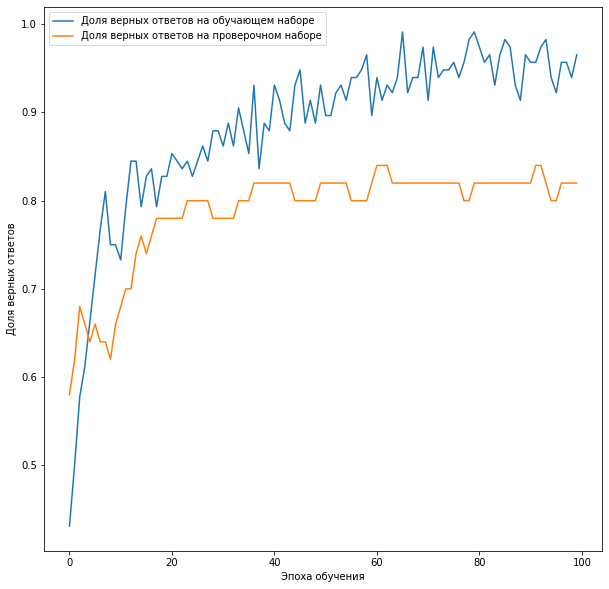

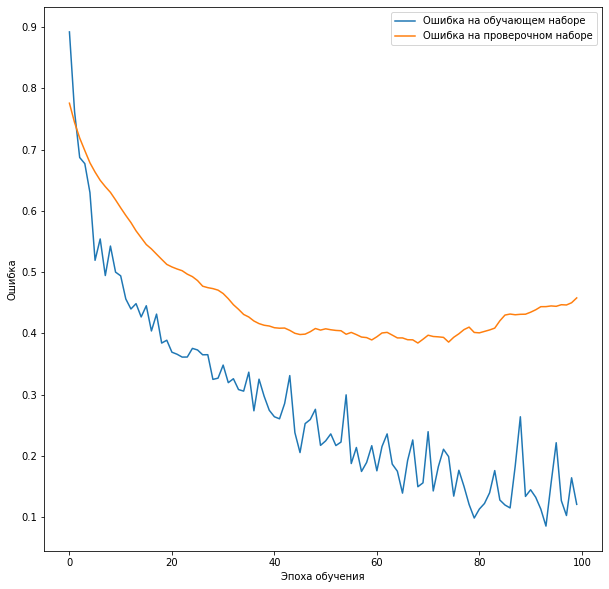

2/2 [==============================] - 0s 2ms/step - loss: 0.3200 - accuracy: 0.9048
0.9047619104385376
Доля верных ответов на тестовых данных, в процентах: 90.4762%


0.9048

In [129]:
# Создаём пустую сеть
model = createModelPRO1()
# Обучаем сеть
history = model.fit(x_train_new, y_train_new, batch_size=16, epochs=100, validation_data=(x_val, y_val), verbose=True)
printHistory(history)
modelTest(model,x_test,y_test)

Выводы
- не понимаю с чем связана точность на тестовых данных, получал 90% точность на очень разных архитектурах и размерах сети. Не усмотрел кореляцию между точностью модели и графиками ошибки на обучающих и валидационных данных
- точность резко меняется от прохода к проходу при неизменной архитектуре сети, пришлось многократно запускать обучение для получения максимальных значений, колебания как правила в пределах 15%
- перезапуск обучения модели с большой вероятностью приведёт к ухудшению точности

Задание PRO 2

Загружаем данные

In [130]:
# Считываем csv с помощью pandas
cars = pd.read_csv('cars_new.csv', sep=',')

# Создаём словарь поле - его индекс
def create_dict(s):
  ret = {}                          # Создаём пустой словарь
  for _id, name in enumerate(s):    # Проходим по всем парам - id и название
    ret.update({name: _id})         # Добавляем в словарь
  return ret

# Функция преобразования в one hot encoding
def to_ohe(value, d):
  arr = [0] * len(d)
  arr[d[value]] = 1
  return arr

# Создаём словари по всем текстовым колонкам
marks_dict = create_dict(set(cars['mark']))
models_dict = create_dict(set(cars['model']))
bodies_dict = create_dict(set(cars['body']))
kpps_dict = create_dict(set(cars['kpp']))
fuels_dict = create_dict(set(cars['fuel']))

# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры
# и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [131]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходам по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = to_ohe(car[0], marks_dict) + \
        to_ohe(car[1], models_dict) + \
        to_ohe(car[5], bodies_dict) + \
        to_ohe(car[6], kpps_dict) + \
        to_ohe(car[7], fuels_dict) + \
        [years[_id]] + \
        [mileages[_id]] + \
        [volumes[_id]] + \
        [powers[_id]]

  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [132]:
x_test = x_train[-5000:]
y_test = y_train[-5000:]

x_val = x_train[-10000:-5000]
y_val = y_train[-10000:-5000]

x_train_new = x_train[:-10000]
y_train_new = y_train[:-10000]

# Нормализуем y_train
y_scaler = StandardScaler()
y_train_new_scaled = y_scaler.fit_transform(y_train_new.reshape(-1,1)).flatten()
y_val_scaled = y_scaler.fit_transform(y_val.reshape(-1,1)).flatten()
y_test_scaled = y_scaler.fit_transform(y_test.reshape(-1,1)).flatten()

In [135]:
# Функция пересоздаёт пустую сеть
def createModelPRO2():

  # Создаем сеть
  model = Sequential()

  # Добавляем слои
  model.add(Dense(3000, input_dim=3208, activation='linear'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(3000,  activation='linear'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='linear'))

  # Компилируем сеть
  model.compile(loss='mse', optimizer=Adam(lr=0.001), metrics=['accuracy'])

  return model # Возвращаем созданную сеть

Epoch 1/10
470/470 [==============================] - 4s 8ms/step - loss: 11.2791 - accuracy: 0.0000e+00 - val_loss: 0.6788 - val_accuracy: 0.0000e+00
Epoch 2/10
470/470 [==============================] - 3s 7ms/step - loss: 0.6336 - accuracy: 0.0000e+00 - val_loss: 0.3866 - val_accuracy: 0.0000e+00
Epoch 3/10
470/470 [==============================] - 4s 8ms/step - loss: 0.3469 - accuracy: 0.0000e+00 - val_loss: 0.5292 - val_accuracy: 0.0000e+00
Epoch 4/10
470/470 [==============================] - 3s 7ms/step - loss: 0.2931 - accuracy: 0.0000e+00 - val_loss: 0.3318 - val_accuracy: 0.0000e+00
Epoch 5/10
470/470 [==============================] - 4s 8ms/step - loss: 0.2713 - accuracy: 0.0000e+00 - val_loss: 0.5652 - val_accuracy: 0.0000e+00
Epoch 6/10
470/470 [==============================] - 3s 7ms/step - loss: 0.3201 - accuracy: 0.0000e+00 - val_loss: 0.3480 - val_accuracy: 0.0000e+00
Epoch 7/10
470/470 [==============================] - 4s 8ms/step - loss: 0.3350 - accuracy: 0.0000

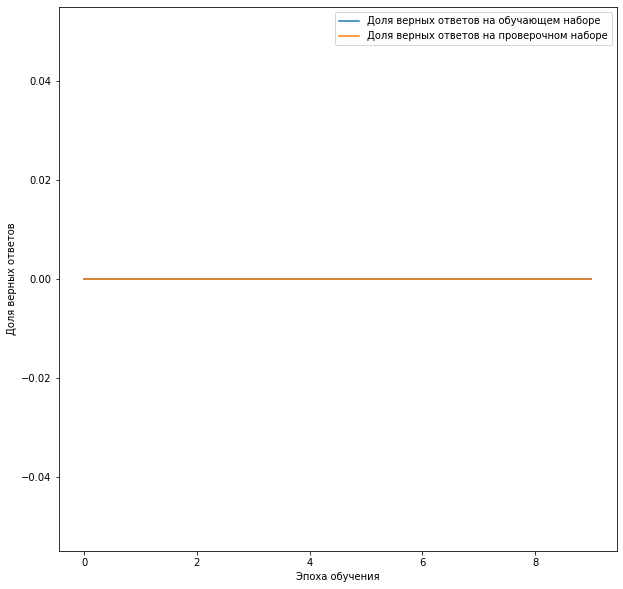

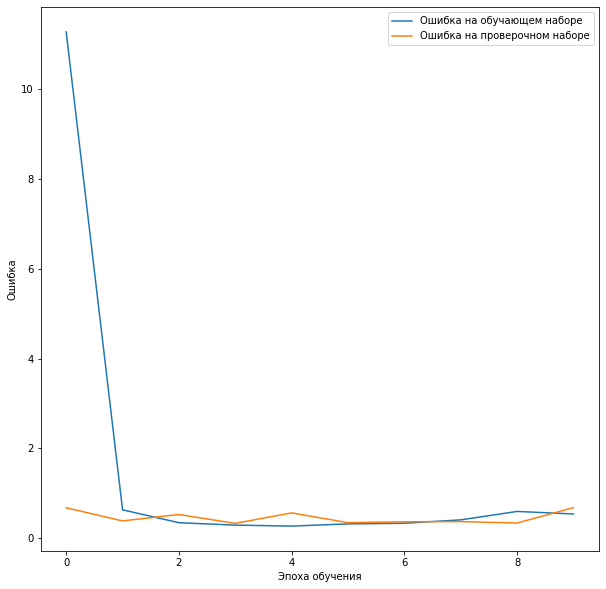

157/157 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.0000e+00
0.0
Доля верных ответов на тестовых данных, в процентах: 0.0%


0.0

In [136]:
# Создаём пустую сеть
model = createModelPRO2()
# Обучаем сеть
history = model.fit(x_train_new, y_train_new_scaled, batch_size=128, epochs=10, validation_data=(x_val, y_val_scaled), verbose=True)
printHistory(history)
modelTest(model,x_test,y_test_scaled)

In [137]:
predict = model.predict(x_test)
print(predict[0])


[1.8565074]
